In [1]:
    # Data processing
import pandas as pd
import numpy as np
# Data visualization
from matplotlib import pyplot
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.datasets import make_blobs
import seaborn as sns
# Model and performance
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from xgboost import XGBClassifier
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.feature_selection import RFECV 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.inspection import permutation_importance
from scipy.cluster.hierarchy import dendrogram, linkage
import scipy.cluster.hierarchy as shc
import itertools
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [2]:
# Load the dataset
orders = pd.read_csv('orders.csv')
order_products_prior = pd.read_csv('order_products__prior.csv')
products = pd.read_csv('products.csv')

In [4]:
orders

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0
...,...,...,...,...,...,...,...
3421078,2266710,206209,prior,10,5,18,29.0
3421079,1854736,206209,prior,11,4,10,30.0
3421080,626363,206209,prior,12,1,12,18.0
3421081,2977660,206209,prior,13,1,12,7.0


In [5]:
order_products_prior

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0
...,...,...,...,...
32434484,3421083,39678,6,1
32434485,3421083,11352,7,0
32434486,3421083,4600,8,0
32434487,3421083,24852,9,1


In [6]:
products

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13
...,...,...,...,...
49683,49684,"Vodka, Triple Distilled, Twist of Vanilla",124,5
49684,49685,En Croute Roast Hazelnut Cranberry,42,1
49685,49686,Artisan Baguette,112,3
49686,49687,Smartblend Healthy Metabolism Dry Cat Food,41,8


In [65]:
merge_df = pd.merge(orders, order_products_prior, on ='order_id')
merge_df = pd.merge(merge_df, products, on = 'product_id')
merge_df

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id
0,2539329,1,prior,1,2,8,NaN,196,1,0,Soda,77,7
1,2398795,1,prior,2,3,7,15.0,196,1,1,Soda,77,7
2,473747,1,prior,3,3,12,21.0,196,1,1,Soda,77,7
3,2254736,1,prior,4,4,7,29.0,196,1,1,Soda,77,7
4,431534,1,prior,5,4,15,28.0,196,1,1,Soda,77,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32434484,1320836,202557,prior,17,2,15,1.0,43553,2,1,Orange Energy Shots,64,7
32434485,31526,202557,prior,18,5,11,3.0,43553,2,1,Orange Energy Shots,64,7
32434486,758936,203436,prior,1,2,7,NaN,42338,4,0,"Zucchini Chips, Pesto",50,19
32434487,2745165,203436,prior,2,3,5,15.0,42338,16,1,"Zucchini Chips, Pesto",50,19


In [14]:
duplicates =  merge_df[merge_df.duplicated()]
duplicates

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id


In [17]:
merge_df.isnull().sum()

order_id                        0
user_id                         0
eval_set                        0
order_number                    0
order_dow                       0
order_hour_of_day               0
days_since_prior_order    2078068
product_id                      0
add_to_cart_order               0
reordered                       0
product_name                    0
aisle_id                        0
department_id                   0
dtype: int64

In [22]:
merge_df.dropna(inplace=True)
merge_df.isna().sum()

order_id                  0
user_id                   0
eval_set                  0
order_number              0
order_dow                 0
order_hour_of_day         0
days_since_prior_order    0
product_id                0
add_to_cart_order         0
reordered                 0
product_name              0
aisle_id                  0
department_id             0
dtype: int64

In [114]:
ds_df = merge_df.sample(frac=.003, random_state = 42)
ds_df = pd.DataFrame(ds_df)
ds_df

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id
29481110,2889478,167307,prior,2,2,14,2.0,15324,14,0,Cran-Grape Juice,98,7
2852353,2092464,69323,prior,4,0,8,14.0,19057,4,1,Organic Large Extra Fancy Fuji Apple,24,4
11194500,2660758,31498,prior,2,4,8,30.0,36724,12,0,Organic Sea Salt Roasted Seaweed Snacks,66,6
15909397,2250832,186419,prior,86,1,13,7.0,33303,9,1,Organic Hummus,123,4
6101870,1219535,202638,prior,2,6,7,11.0,24838,1,0,Unsweetened Almondmilk,91,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31743963,3267886,40806,prior,20,6,6,5.0,8393,3,1,Peeled Italian Plum Tomatoes,81,15
31331533,1520196,116778,prior,11,0,16,30.0,31519,11,0,Gluten Free Strawberry Breakfast Bars,48,14
20638534,1884100,61033,prior,1,6,8,NaN,19173,2,0,Orange Calcium & Vitamin D Pulp Free,98,7
9925315,329105,142735,prior,76,1,22,2.0,15872,5,1,Celery Hearts,83,4


In [134]:
ds_df.to_csv(r'C:\Users\p-mir\MS Data Science\Big Data Technologies\Final\downsized_data.csv', index=False)

In [115]:
# Feature Engineering

# calculate days between orders
days_since_previous_order = ds_df.groupby('user_id')['days_since_prior_order'].first()
days_since_previous_order = days_since_previous_order.rename('days_since_previous_order')
ds_df = pd.merge(ds_df, days_since_previous_order, on = 'user_id')

# calculate total orders per customer
total_orders = ds_df.groupby('user_id')['order_number'].max()
total_orders = total_orders.rename('total_orders')
ds_df = ds_df.merge(total_orders, on='user_id')

# calculate average days between orders
days_between = ds_df.groupby('user_id')['days_since_prior_order'].mean()
days_between = days_between.rename('avg_days_between_orders')
ds_df = ds_df.merge(days_between, on='user_id')

# count total number of orders per customer
total_orders = ds_df.groupby('user_id')['order_id'].nunique().reset_index(name='total_orders')
# filter for reorders only
reorders = ds_df[ds_df['reordered'] == 1]
# count number of reorders per customer
reorders_per_customer = reorders.groupby('user_id')['order_id'].nunique().reset_index(name='reorders')
# merge the two dataframes
customer_reorders = pd.merge(total_orders, reorders_per_customer, on='user_id').fillna(0)
# calculate the percentage of reorders per customer
customer_reorders['reorder_percentage'] = customer_reorders['reorders'] / customer_reorders['total_orders'] * 100
# merge the reorder percentage column to the merged dataframe
ds_df = pd.merge(ds_df, customer_reorders[['user_id', 'reorder_percentage']], on='user_id')

# calculate average basket size
avg_basket_size = ds_df.groupby('order_id')['add_to_cart_order'].mean()
#avg_basket_size = basket_size.groupby('user_id').mean()
avg_basket_size = avg_basket_size.rename('avg_basket_size')
ds_df = pd.merge(ds_df, avg_basket_size, on='order_id')

# count the number of orders that include at least one reordered product
reorder_counts = merge_df.groupby(['user_id', 'order_id'])['reordered'].sum()
reorder_counts = reorder_counts.groupby('user_id').sum()
# merge the reorder counts into the merged_df DataFrame
ds_df = pd.merge(ds_df, reorder_counts.rename('total_reorders'), on='user_id')



In [116]:
ds_df = pd.DataFrame(ds_df)
ds_df

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,days_since_previous_order,total_orders,avg_days_between_orders,reorder_percentage,avg_basket_size,total_reorders
0,2092464,69323,prior,4,0,8,14.0,19057,4,1,Organic Large Extra Fancy Fuji Apple,24,4,14.0,5,22.0,100.0,4.0,111
1,3054441,69323,prior,5,0,17,30.0,45535,12,1,Organic Low Sodium Chicken Broth,69,15,14.0,5,22.0,100.0,12.0,111
2,2250832,186419,prior,86,1,13,7.0,33303,9,1,Organic Hummus,123,4,7.0,87,5.5,100.0,9.0,681
3,679071,186419,prior,11,3,17,9.0,30391,5,1,Organic Cucumber,83,4,7.0,87,5.5,100.0,5.0,681
4,1124370,186419,prior,87,3,14,2.0,9438,4,1,Honey Graham Sticks,61,19,7.0,87,5.5,100.0,4.0,681
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71266,3093426,42792,prior,11,5,14,2.0,35951,15,1,Organic Unsweetened Almond Milk,91,16,2.0,11,2.0,100.0,15.0,563
71267,896635,6153,prior,7,5,12,4.0,13176,3,1,Bag of Organic Bananas,24,4,4.0,7,4.0,100.0,3.0,55
71268,8249,135385,prior,27,2,22,9.0,4957,12,1,Total 2% Lowfat Greek Strained Yogurt With Blu...,120,16,9.0,27,9.0,100.0,12.0,414
71269,1845337,26919,prior,19,5,5,19.0,29987,2,1,Shredded Mozzarella,21,16,19.0,19,19.0,100.0,2.0,217


In [117]:
# Creating a feature engineered DataFrame for analysis
feature_df = ds_df.drop(columns = ['order_id', 'eval_set', 'order_number', 'order_dow', 'order_hour_of_day', 'days_since_prior_order', 'product_id', 'add_to_cart_order', 'reordered', 'product_name', 'aisle_id', 'department_id'], axis=1)
feature_df

,user_id,days_since_previous_order,total_orders,avg_days_between_orders,reorder_percentage,avg_basket_size,total_reorders
0,69323,14.0,5,22.0,100.0,4.0,111
1,69323,14.0,5,22.0,100.0,12.0,111
2,186419,7.0,87,5.5,100.0,9.0,681
3,186419,7.0,87,5.5,100.0,5.0,681
4,186419,7.0,87,5.5,100.0,4.0,681
...,...,...,...,...,...,...,...
71266,42792,2.0,11,2.0,100.0,15.0,563
71267,6153,4.0,7,4.0,100.0,3.0,55
71268,135385,9.0,27,9.0,100.0,12.0,414
71269,26919,19.0,19,19.0,100.0,2.0,217


In [133]:
feature_df.to_csv(r'C:\Users\p-mir\MS Data Science\Big Data Technologies\Final\feature_data.csv', index=False)

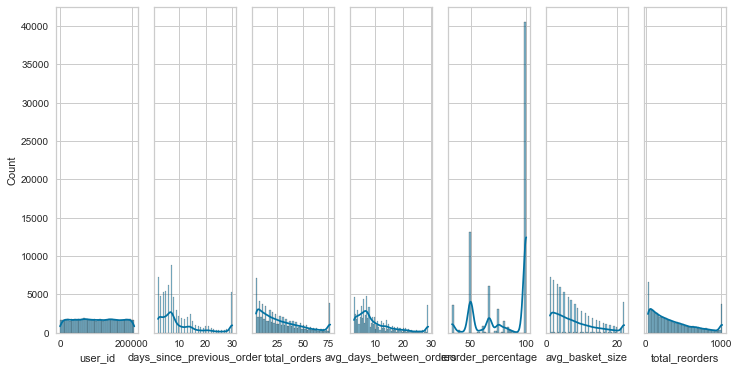

user_id                      0.007896
days_since_previous_order    1.285247
total_orders                 0.862009
avg_days_between_orders      1.283827
reorder_percentage          -0.718370
avg_basket_size              0.918505
total_reorders               0.895724
dtype: float64

In [126]:
fig, axes = plt.subplots(1,7, sharey=True, figsize = [12,6])

sns.histplot(x='user_id', data = feature_df, kde=True, ax=axes[0])
sns.histplot(x='days_since_previous_order', data = feature_df, kde=True, ax=axes[1])
sns.histplot(x='total_orders', data = feature_df, kde=True, ax=axes[2])
sns.histplot(x='avg_days_between_orders', data = feature_df, kde=True, ax=axes[3])
sns.histplot(x='reorder_percentage', data = feature_df, kde=True, ax=axes[4])
sns.histplot(x='avg_basket_size', data = feature_df, kde=True, ax=axes[5])
sns.histplot(x='total_reorders', data = feature_df, kde=True, ax=axes[6])

plt.show()

feature_df.skew()

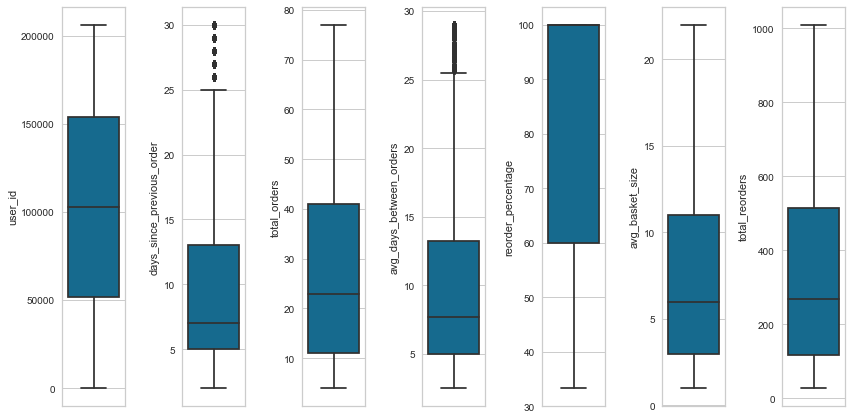

In [128]:
#Boxplots to assess skew
fig, axes = plt.subplots(1,7, sharey=False, figsize = [12,6])

sns.boxplot(y='user_id', data = feature_df, ax=axes[0])
sns.boxplot(y='days_since_previous_order', data = feature_df, ax=axes[1])
sns.boxplot(y='total_orders', data = feature_df, ax=axes[2])
sns.boxplot(y='avg_days_between_orders', data = feature_df, ax=axes[3])
sns.boxplot(y='reorder_percentage', data = feature_df, ax=axes[4])
sns.boxplot(y='avg_basket_size', data = feature_df, ax=axes[5])
sns.boxplot(y='total_reorders', data = feature_df, ax=axes[6])

plt.tight_layout()
plt.show()

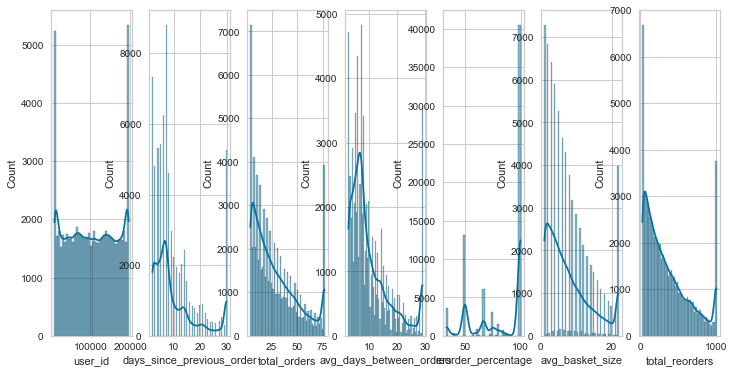

user_id                      0.007536
days_since_previous_order    1.285247
total_orders                 0.862009
avg_days_between_orders      1.283827
reorder_percentage          -0.718370
avg_basket_size              0.918505
total_reorders               0.895724
dtype: float64

<Figure size 576x396 with 0 Axes>

In [130]:
#Removing 5% and 95% quantiles

feature_df['user_id'].clip(lower=feature_df['user_id'].quantile(.05),
                                             upper=feature_df['user_id'].quantile(.95),
                                             inplace=True)

feature_df['days_since_previous_order'].clip(lower=feature_df['days_since_previous_order'].quantile(.05),
                                             upper=feature_df['days_since_previous_order'].quantile(.95),
                                             inplace=True)

feature_df['total_orders'].clip(lower=feature_df['total_orders'].quantile(.05),
                                             upper=feature_df['total_orders'].quantile(.95),
                                             inplace=True)

feature_df['avg_days_between_orders'].clip(lower=feature_df['avg_days_between_orders'].quantile(.05),
                                             upper=feature_df['avg_days_between_orders'].quantile(.95),
                                             inplace=True)

feature_df['reorder_percentage'].clip(lower=feature_df['reorder_percentage'].quantile(.05),
                                             upper=feature_df['reorder_percentage'].quantile(.95),
                                             inplace=True)

feature_df['avg_basket_size'].clip(lower=feature_df['avg_basket_size'].quantile(.05),
                                             upper=feature_df['avg_basket_size'].quantile(.95),
                                             inplace=True)

feature_df['total_reorders'].clip(lower=feature_df['total_reorders'].quantile(.05),
                                             upper=feature_df['total_reorders'].quantile(.95),
                                             inplace=True)

#Plotting after removing quantiles
fig, axes = plt.subplots(1,7, sharey=False, figsize = [12,6])

sns.histplot(x='user_id', data = feature_df, kde=True, ax=axes[0])
sns.histplot(x='days_since_previous_order', data = feature_df, kde=True, ax=axes[1])
sns.histplot(x='total_orders', data = feature_df, kde=True, ax=axes[2])
sns.histplot(x='avg_days_between_orders', data = feature_df, kde=True, ax=axes[3])
sns.histplot(x='reorder_percentage', data = feature_df, kde=True, ax=axes[4])
sns.histplot(x='avg_basket_size', data = feature_df, kde=True, ax=axes[5])
sns.histplot(x='total_reorders', data = feature_df, kde=True, ax=axes[6])


plt.show()

plt.tight_layout()
feature_df.skew()

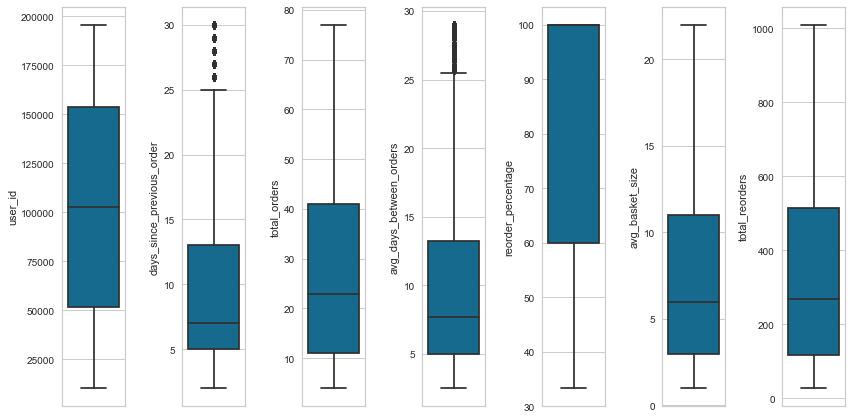

In [131]:
#Boxplots to assess skew
fig, axes = plt.subplots(1,7, sharey=False, figsize = [12,6])

sns.boxplot(y='user_id', data = feature_df, ax=axes[0])
sns.boxplot(y='days_since_previous_order', data = feature_df, ax=axes[1])
sns.boxplot(y='total_orders', data = feature_df, ax=axes[2])
sns.boxplot(y='avg_days_between_orders', data = feature_df, ax=axes[3])
sns.boxplot(y='reorder_percentage', data = feature_df, ax=axes[4])
sns.boxplot(y='avg_basket_size', data = feature_df, ax=axes[5])
sns.boxplot(y='total_reorders', data = feature_df, ax=axes[6])

plt.tight_layout()
plt.show()

C:\Users\p-mir\anaconda3\lib\site-packages\seaborn\matrix.py:302: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  mesh = ax.pcolormesh(self.plot_data, cmap=self.cmap, **kws)
C:\Users\p-mir\anaconda3\lib\site-packages\seaborn\matrix.py:312: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cb = ax.figure.colorbar(mesh, cax, ax, **self.cbar_kws)


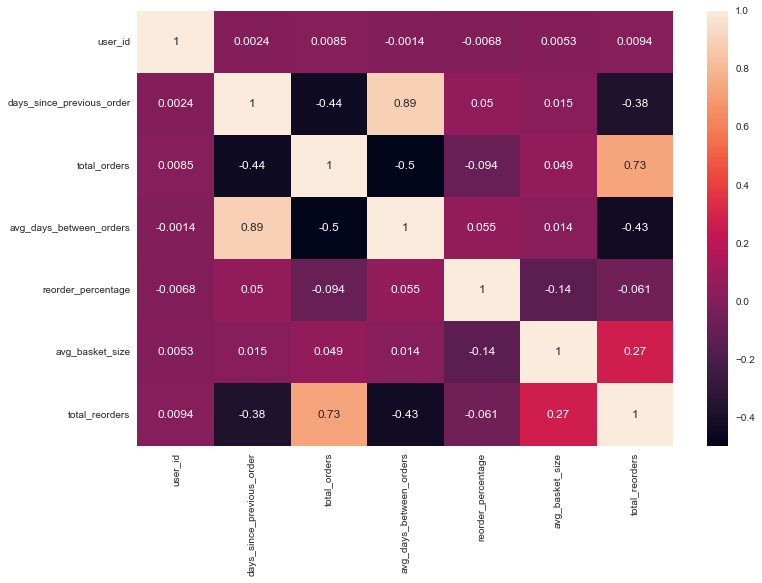

In [132]:
#Correlation Map
feature_df_corr = feature_df.corr()
plt.figure(figsize=[12,8])

sns.heatmap(feature_df_corr, xticklabels=feature_df_corr.columns, yticklabels=feature_df_corr.columns, annot=True)
plt.show()